In [141]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import pearsonr, spearmanr



# Load data

In [142]:
df=pd.read_csv("./movies_metadata.csv")
df.head()

C:\Users\anuso\AppData\Local\Temp\ipykernel_21644\1461538378.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Exploratory Data Analysis (EDA)

## วิเคราะห์ข้อมูล

### วิเคราะห์การกระจายตัวของข้อมูลที่เป็นตัวเลข

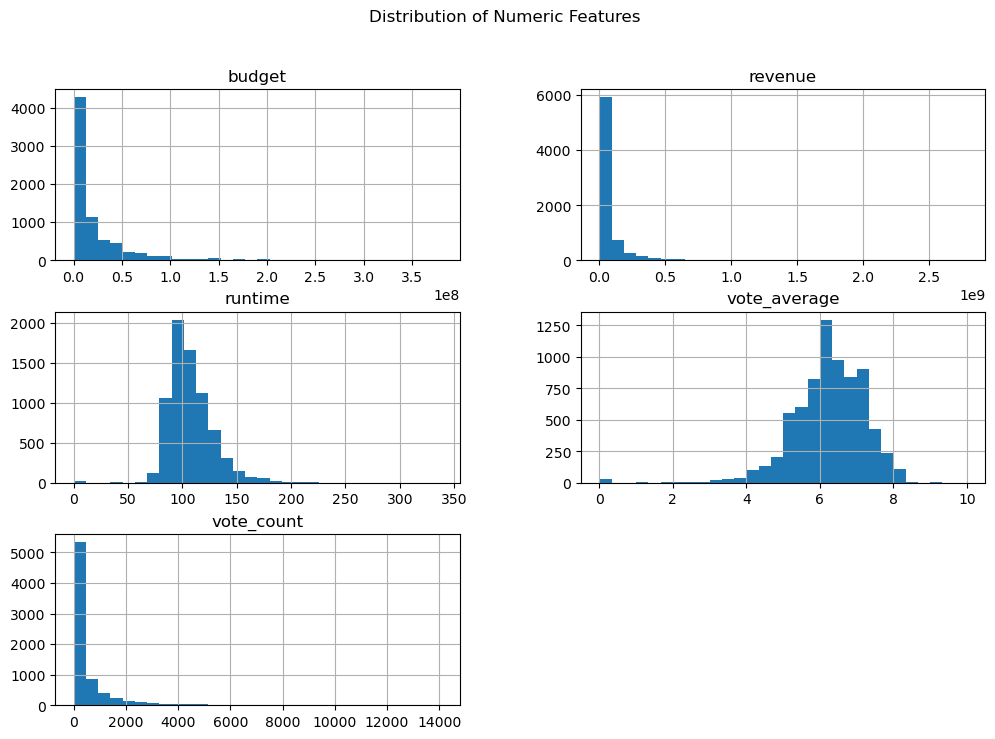

In [150]:
# การกระจายค่าของตัวเลขสำคัญ
num_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()

### วิเคราะห์การกระจายตัวของข้อมูล โดยใช้ log tranformation

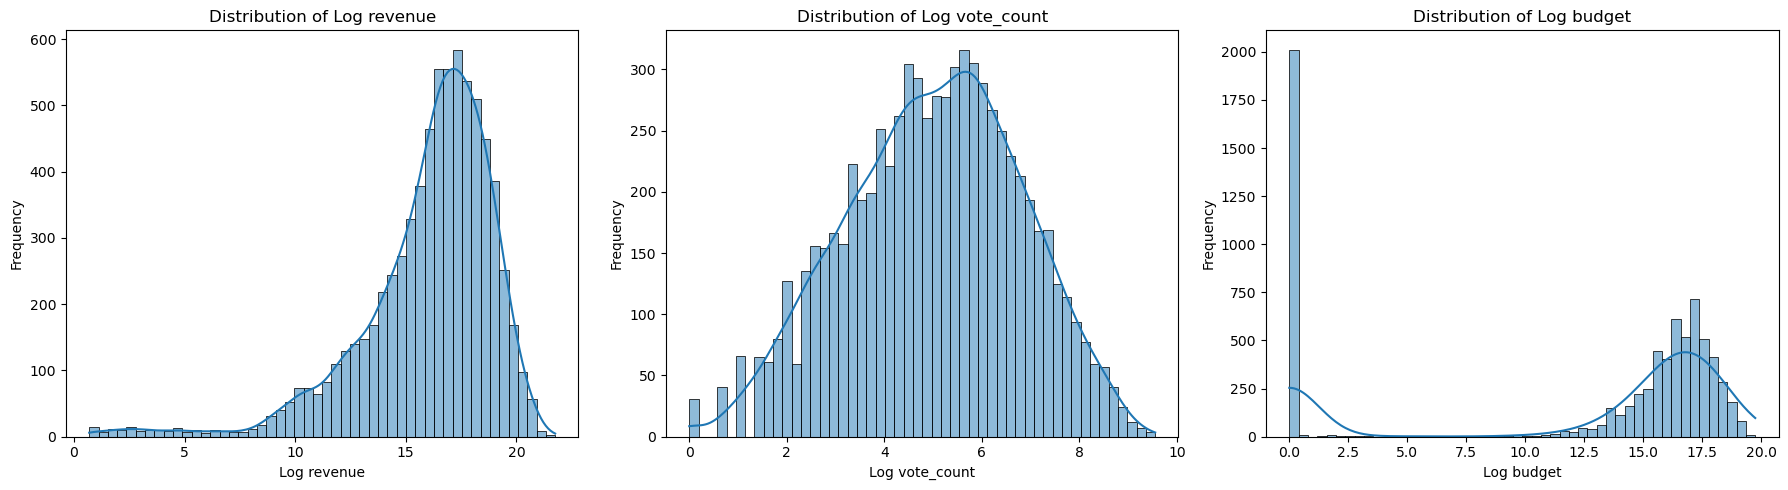

In [151]:
columns = ['revenue', 'vote_count', 'budget']

# สร้าง subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

for i, col in enumerate(columns):
    sns.histplot(np.log1p(df[col]), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Log {col}')
    axes[i].set_xlabel(f'Log {col}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### วิเคราะห์ความสัมพันธ์กันของแต่ละคอลัมณ์

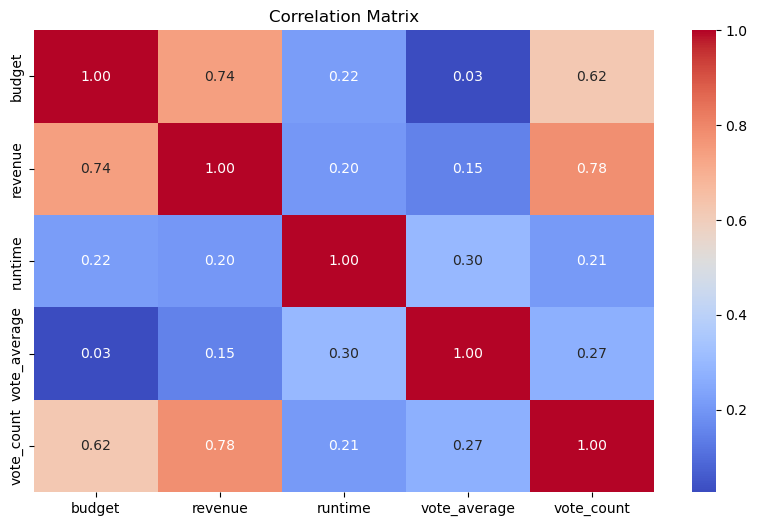

In [152]:
# ตรวจสอบความสัมพันธ์ระหว่างตัวเลข
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### วิเคราะห์ความสัมพันธ์ของข้อมูลโดยใช้ scatter plot

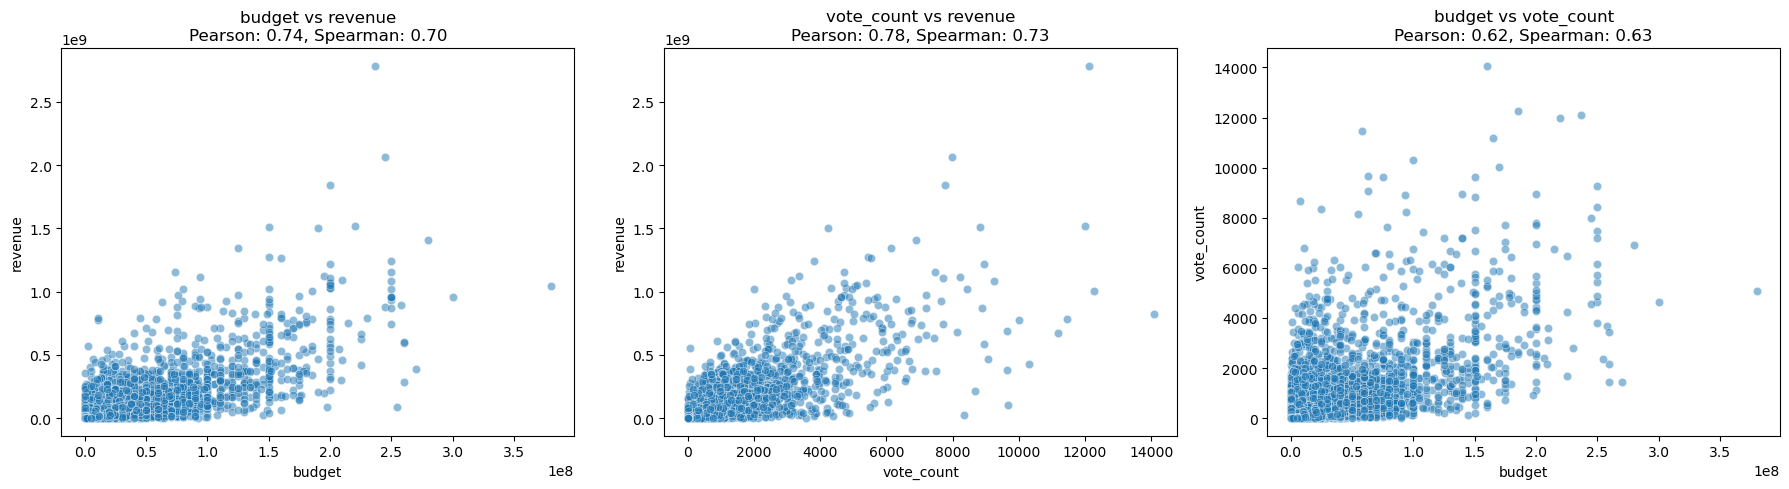

In [153]:
pairs = [('budget', 'revenue'), ('vote_count', 'revenue'), ('budget', 'vote_count')]

# สร้างกราฟ Scatter Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x, y) in enumerate(pairs):
    # คำนวณ Pearson และ Spearman correlation
    pearson_corr, _ = pearsonr(df[x], df[y])
    spearman_corr, _ = spearmanr(df[x], df[y])

    # Scatter plot
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{x} vs {y}\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}')

plt.tight_layout()
plt.show()

### วิเคราะห์แนวโน้มการทำรายได้ของภาพยนต์ในแต่ละปี
<p> จะเห็นได้ว่าอุตสาหกรรมภาพยนต์มีการเติบโตขึ้นอย่างต่อเนื่อง

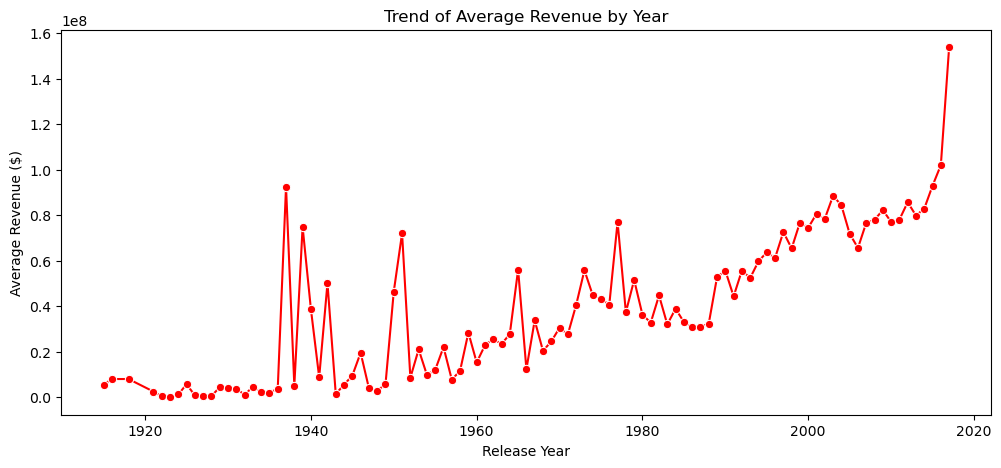

In [154]:

# คำนวณรายได้เฉลี่ยของแต่ละปี
yearly_revenue = df.groupby('release_year')['revenue'].mean().reset_index()

# ดูแนวโน้มรายได้เฉลี่ยต่อปี
plt.figure(figsize=(12, 5))
sns.lineplot(x='release_year', y='revenue', data=yearly_revenue, marker="o", color='red')
plt.title("Trend of Average Revenue by Year")
plt.xlabel("Release Year")
plt.ylabel("Average Revenue ($)")
plt.show()

### วิเคราะห์รายได้ของภาพยนต์ในแต่ละช่วงเดือน

จะเห็นได้ว่าในช่วงไตรมาสที่ 2 ของปี ภาพยนต์มีแนวโน้มที่จะทำรายได้สูง

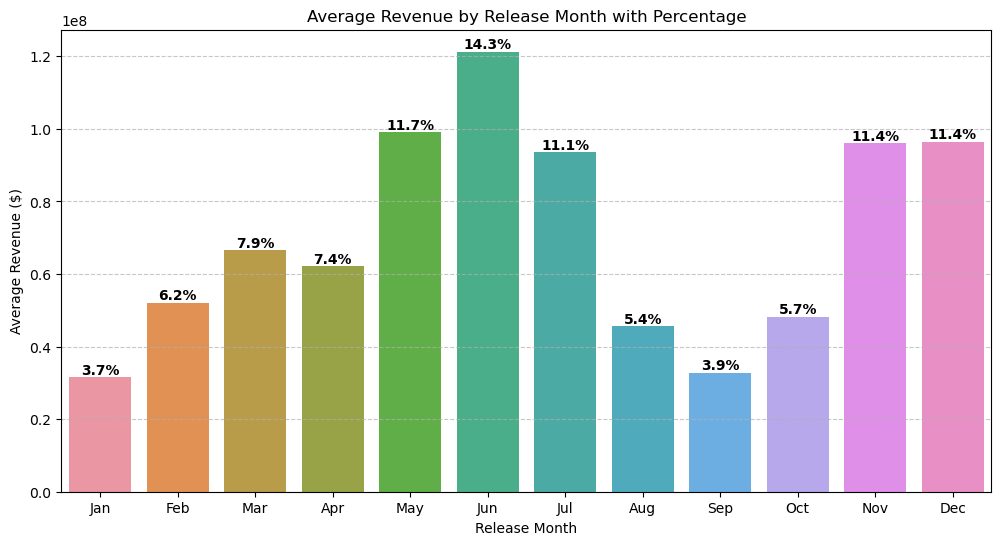

In [155]:
monthly_revenue = df.groupby('release_month')['revenue'].mean().sort_index()

# คำนวณ % ของแต่ละเดือน
total_revenue = monthly_revenue.sum()
monthly_percent = (monthly_revenue / total_revenue) * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)

# แสดง % บนแต่ละแท่ง
for index, value in enumerate(monthly_revenue.values):
    percent = monthly_percent.iloc[index]
    plt.text(index, value, f"{percent:.1f}%", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.title("Average Revenue by Release Month with Percentage")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### วิเคราะห์รายได้ของภาพยนต์ในแต่ละช่วงเดือนโดยแยกตามหมวดหมู่ของภาพยนต์

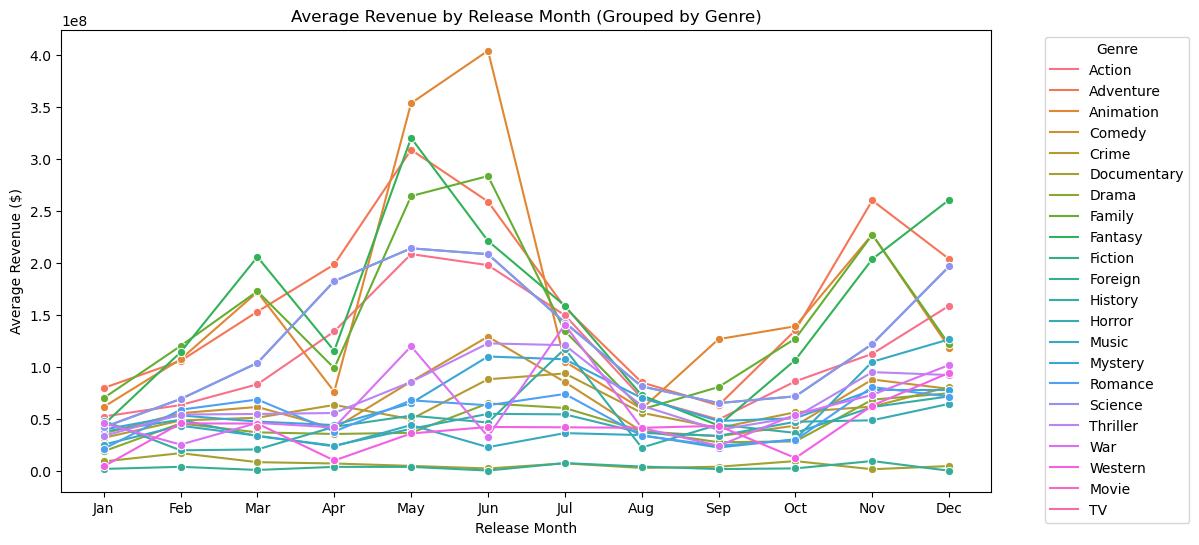

In [156]:

df['genres'] = df['genres'].str.split(' ')  # แยก genres ถ้ามีหลายแนว
df_genres = df.explode('genres')  # ขยายข้อมูลให้ 1 แนวหนังต่อ 1 แถว


# 📌 คำนวณรายได้เฉลี่ยของแต่ละเดือน ตาม Genre
genre_monthly_revenue = df_genres.groupby(['release_month', 'genres'])['revenue'].mean().reset_index()

# 📌 วาดกราฟ Line Plot ดูแนวโน้มของแต่ละแนวหนัง
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_monthly_revenue, x='release_month', y='revenue', hue='genres', marker="o")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Revenue by Release Month (Grouped by Genre)")
plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [157]:
print(df_genres['genres'].unique())

['Animation' 'Comedy' 'Family' 'Adventure' 'Fantasy' 'Drama' 'Romance'
 'Action' 'Crime' 'Thriller' 'History' 'Science' 'Fiction' 'Mystery'
 'Music' 'Horror' 'War' 'Documentary' 'Foreign' 'Western' 'TV' 'Movie']


### แสดงจำนวนภาพยนต์ในแต่ละหมวดหมู่

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Animation'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Family'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Romance'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Science'),
  Text(12, 0, 'Fiction'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'Horror'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Foreign'),
  Text(19, 0, 'Western'),
  Text(20, 0, 'TV'),
  Text(21, 0, 'Movie')])

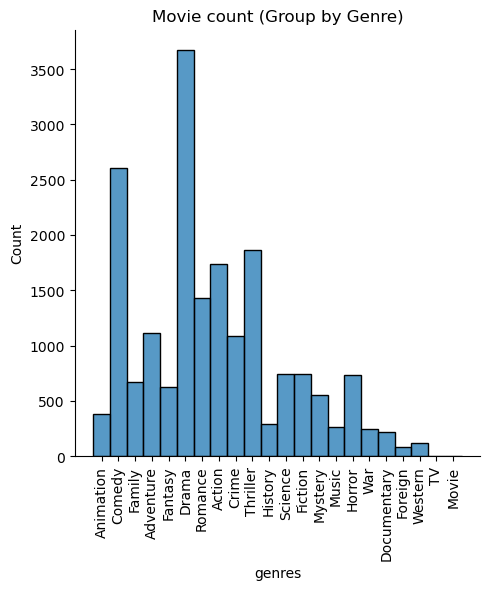

In [158]:
sns.displot(df_genres['genres'])
plt.title("Movie count (Group by Genre)")
plt.xticks(rotation=90)

### แสดงคะแนนโหวตเฉลี่ยของภาพยนต์ในแต่ละหมวดหมู่

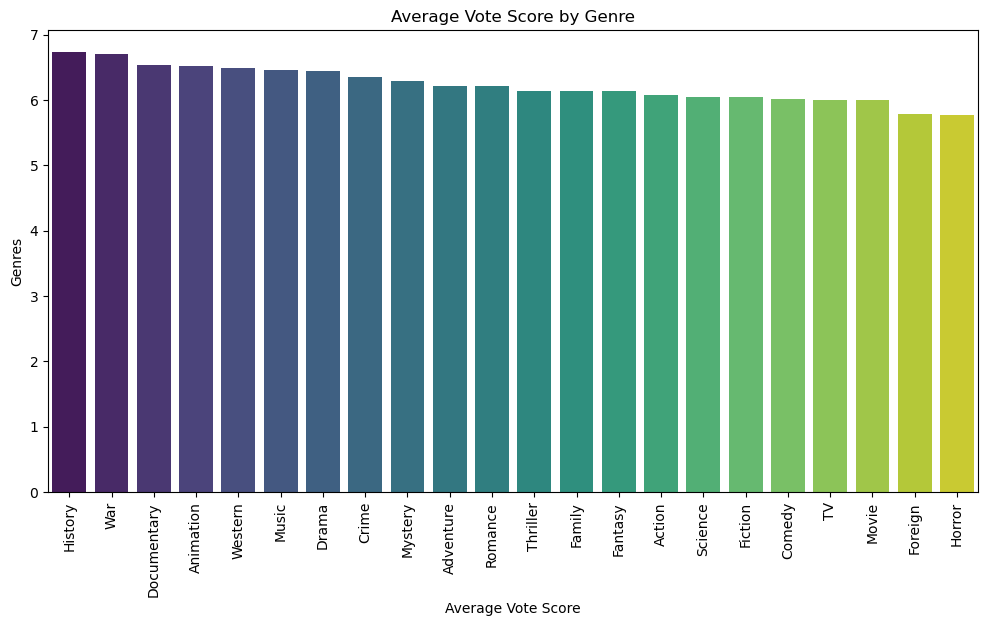

In [159]:
# คำนวณคะแนนเฉลี่ยของแต่ละแนว
genre_avg_score = df_genres.groupby('genres')['vote_average'].mean().sort_values(ascending=False)

# แสดงผลลัพธ์
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_score.index, y=genre_avg_score.values, palette="viridis")
plt.xlabel("Average Vote Score")
plt.ylabel("Genres")
plt.title("Average Vote Score by Genre")
plt.xticks(rotation=90)
plt.show()

### แสดงการทำรายได้ของภาพยนต์แต่ละหมวดหมู่

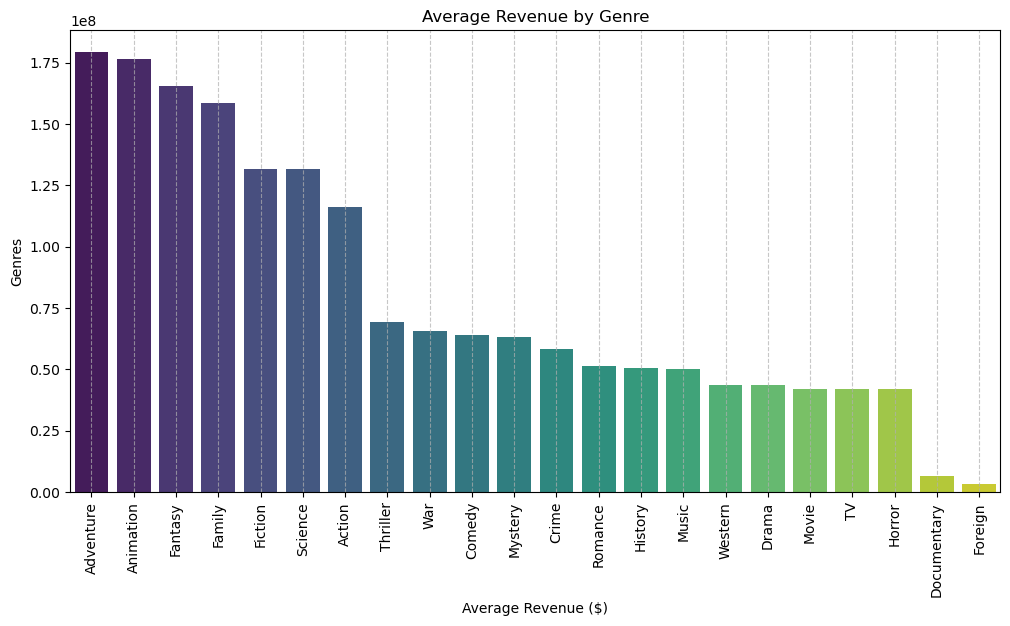

In [160]:
# 📌 คำนวณรายได้เฉลี่ยของแต่ละแนวหนัง
genre_revenue = df_genres.groupby('genres')['revenue'].mean().sort_values(ascending=False)

# 📌 วาดกราฟ Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette="viridis")

# 📌 ตกแต่งกราฟ
plt.xlabel("Average Revenue ($)")
plt.ylabel("Genres")
plt.title("Average Revenue by Genre")
plt.xticks(rotation=90)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# 📌 แสดงผล
plt.show()

### แสดงรายได้เฉลี่ยในไตรมาส 2 เทียบกับรายได้เฉลี่ยในแต่ละปี

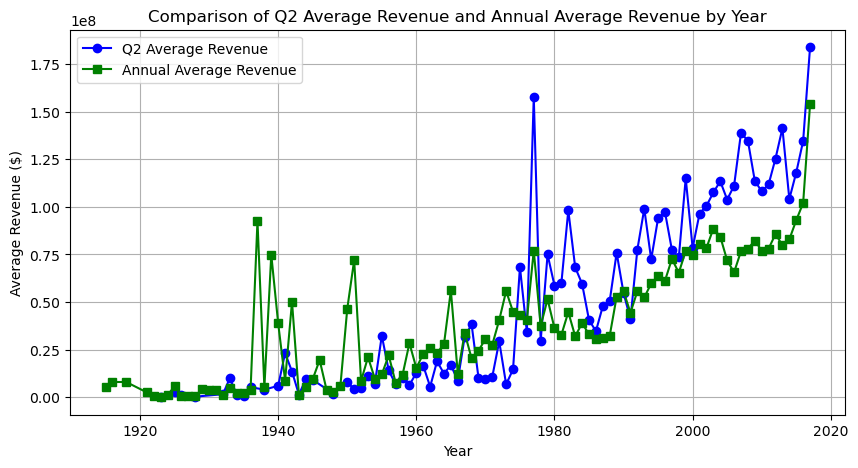

In [161]:
df_q2=df[df['release_month'].isin([4, 5, 6])]
q2_avg_per_year = df_q2.groupby(df_q2['release_date'].dt.year)['revenue'].mean()

# คำนวณรายได้เฉลี่ยทั้งปี
annual_avg_per_year = df.groupby(df['release_date'].dt.year)['revenue'].mean()

# 🔹 สร้างกราฟเปรียบเทียบรายได้เฉลี่ย Q2 และรายได้เฉลี่ยทั้งปี
plt.figure(figsize=(10, 5))
plt.plot(q2_avg_per_year.index, q2_avg_per_year.values, marker='o', label="Q2 Average Revenue", color='b')
plt.plot(annual_avg_per_year.index, annual_avg_per_year.values, marker='s', label="Annual Average Revenue", color='g')

# 🔹 แสดงกราฟ
plt.xlabel("Year")
plt.ylabel("Average Revenue ($)")
plt.title("Comparison of Q2 Average Revenue and Annual Average Revenue by Year")
plt.legend()
plt.grid(True)
plt.show()

### แสดง % ที่ไตรมาส2ทำรายได้สูงกว่ารายได้เฉลี่ยในแต่ละปี

ค่าเฉลี่ยของ % ที่รายได้เฉลี่ยใน Q2 สูงกว่ารายได้เฉลี่ยของทั้งปี: 11.92%


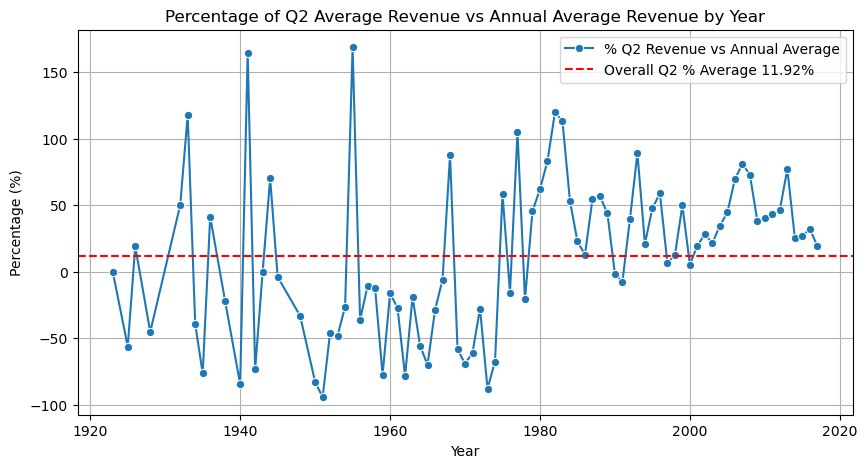

In [ ]:
df_q2 = df[df['release_date'].dt.month.isin([4, 5, 6])]
q2_avg_per_year = df_q2.groupby(df_q2['release_date'].dt.year)['revenue'].mean()

# คำนวณรายได้เฉลี่ยทั้งปี
annual_avg_per_year = df.groupby(df['release_date'].dt.year)['revenue'].mean()

# คำนวณเปอร์เซ็นต์ที่รายได้เฉลี่ยใน Q2 สูงกว่ารายได้เฉลี่ยทั้งปี
q2_vs_annual_percentage = ((q2_avg_per_year-annual_avg_per_year) / annual_avg_per_year ) * 100

# คำนวณค่าเฉลี่ยของเปอร์เซ็นต์
overall_q2_percentage_avg = q2_vs_annual_percentage.mean()
print(f"ค่าเฉลี่ยของ % ที่รายได้เฉลี่ยใน Q2 สูงกว่ารายได้เฉลี่ยของทั้งปี: {overall_q2_percentage_avg:,.2f}%")


plt.figure(figsize=(10, 5))
sns.lineplot(x=q2_vs_annual_percentage.index, y=q2_vs_annual_percentage.values, marker='o', label="% Q2 Revenue vs Annual Average")
plt.axhline(overall_q2_percentage_avg, color='r', linestyle='--', label=f"Overall Q2 % Average {overall_q2_percentage_avg:,.2f}%")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Q2 Average Revenue vs Annual Average Revenue by Year")
plt.legend()
plt.grid(True)
plt.show()

### แสดงรายได้เฉลี่ยในไตรมาส 2 เทียบกับรายได้เฉลี่ยในแต่ละปี

<Figure size 1000x500 with 0 Axes>

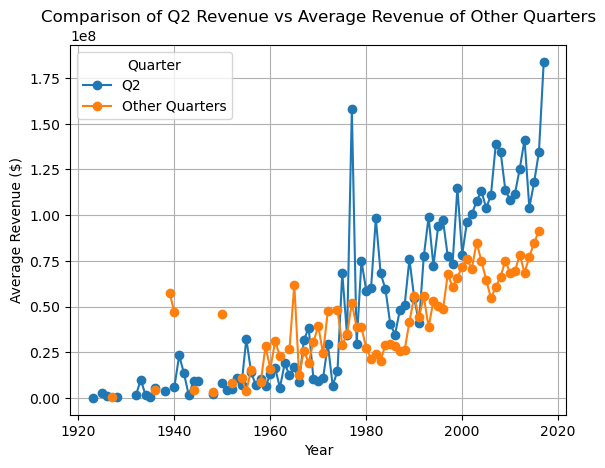

In [ ]:
df['quarter'] = df['release_date'].dt.quarter

# กรองข้อมูลจากไตรมาสที่ 1, 2, 3, และ 4
q1_data = df[df['release_date'].dt.month.isin([1, 2, 3])]
q2_data = df[df['release_date'].dt.month.isin([4, 5, 6])]
q3_data = df[df['release_date'].dt.month.isin([7, 8, 9])]
q4_data = df[df['release_date'].dt.month.isin([10, 11, 12])]

# คำนวณค่าเฉลี่ยรายได้ในแต่ละไตรมาส
q1_avg = q1_data.groupby('release_year')['revenue'].mean()
q2_avg = q2_data.groupby('release_year')['revenue'].mean()
q3_avg = q3_data.groupby('release_year')['revenue'].mean()
q4_avg = q4_data.groupby('release_year')['revenue'].mean()

# รวมค่าเฉลี่ยของ Q1, Q3, Q4
other_quarters_avg = (q1_avg + q3_avg + q4_avg) / 3

# สร้าง DataFrame สำหรับการพล็อตกราฟ
quarterly_avg_comparison = pd.DataFrame({
    'Q2': q2_avg,
    'Other Quarters': other_quarters_avg
})

# พล็อตกราฟ
plt.figure(figsize=(10, 5))
quarterly_avg_comparison.plot(kind='line', marker='o')
plt.title('Comparison of Q2 Revenue vs Average Revenue of Other Quarters')
plt.xlabel('Year')
plt.ylabel('Average Revenue ($)')
plt.grid(True)
plt.legend(title='Quarter', loc='upper left')
plt.show()

### แสดง % ที่ไตรมาส2ทำรายได้สูงกว่ารายได้เฉลี่ยในไตรมาสอื่นๆ

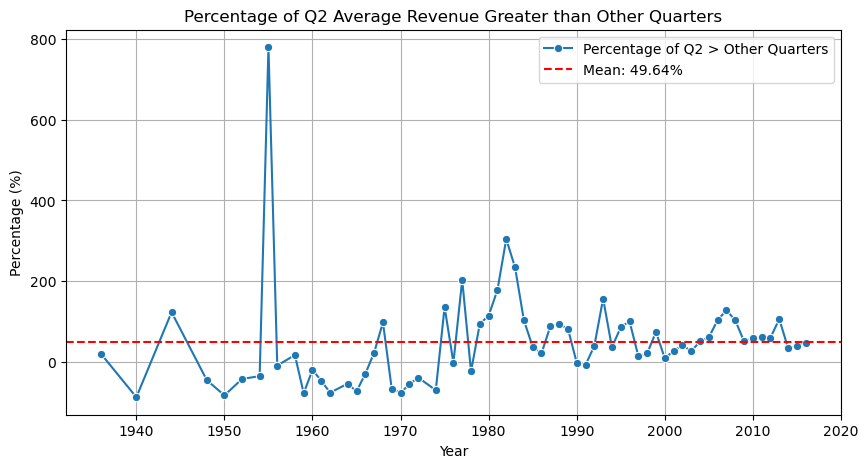

In [164]:
percentage_q2_greater = ((q2_avg - other_quarters_avg) / other_quarters_avg) * 100

# พล็อตกราฟเปอร์เซ็นต์
plt.figure(figsize=(10, 5))
sns.lineplot(x=percentage_q2_greater.index, y=percentage_q2_greater.values, marker='o', label="Percentage of Q2 > Other Quarters")
plt.axhline(percentage_q2_greater.mean(), color='r', linestyle='--', label=f"Mean: {percentage_q2_greater.mean():.2f}%")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Q2 Average Revenue Greater than Other Quarters")
plt.legend()
plt.grid(True)
plt.show()



In [165]:
print(df_genres['genres'].unique())  # ดูว่ามีค่าอะไรอยู่ในคอลัมน์ genre บ้าง
print(df_genres['genres'].isna().sum())

['Animation' 'Comedy' 'Family' 'Adventure' 'Fantasy' 'Drama' 'Romance'
 'Action' 'Crime' 'Thriller' 'History' 'Science' 'Fiction' 'Mystery'
 'Music' 'Horror' 'War' 'Documentary' 'Foreign' 'Western' 'TV' 'Movie']
0


## Hypothesis testing

H0(Null Hypothesis): รายได้เฉลี่ยของภาพยนต์ที่ฉายในไตรมาส 2 สูงกว่ารายได้เฉลี่ยของไตรมาสอื่นๆ 47 % เกิดจากความบังเอิญ

H1(Alternative Hypothesis): รายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 สูงกว่าของไตรมาสอื่นๆ 47 % ไม่ได้เกิดจากความบังเอิญ

In [166]:
mean_q2=df_q2['revenue'].mean()
df_q_other=df.drop(df_q2.index)
mean_other=df_q_other['revenue'].mean()

percentage_increase = (mean_q2 - mean_other) * 100 / mean_other

print(f'รายได้เฉลี่ยของไตรมาสที่ 2 คือ {mean_q2:.2f}')
print(f'รายได้เฉลี่ยของทั้งปีคือ {mean_other:.2f}')


รายได้เฉลี่ยของไตรมาสที่ 2 คือ 94799797.06
รายได้เฉลี่ยของทั้งปีคือ 61146377.61


In [167]:
std_q2=df_q2['revenue'].std()
std_q_other=df_q_other['revenue'].std()
print(f'std ของรายได้ของไตรมาสที่ 2 คือ {std_q2:.2f}')
print(f'std ของรายได้เฉลี่ยของไตรมาสอื่นๆคือ {std_q_other:.2f}')


std ของรายได้ของไตรมาสที่ 2 คือ 193515647.67
std ของรายได้เฉลี่ยของไตรมาสอื่นๆคือ 127927413.00


In [168]:
nq2=len(df_q2)
nqother=len(df_q_other)
print(f'จำนวนข้อมูลของไตรมาสที่ 2 คือ {nq2}')
print(f'จำนวนข้อมูลของไตรมาสอื่นๆคือ {nqother}')


จำนวนข้อมูลของไตรมาสที่ 2 คือ 1733
จำนวนข้อมูลของไตรมาสอื่นๆคือ 5641


### ใช้วิธีการ Resample ในการทดสอบสมมติฐาน 
โดยสุ่มตัวอย่างจำนวน 100000 ครั้ง และนำ gA และ gB มาเปรียบเทียบ% ความต่าง

In [169]:
res = []
for _ in range(100000):
    gA = df.sample(len(df_q2['revenue'])).revenue
    gB = df.drop(gA.index).revenue
    res.append((gA.mean()-gB.mean())/gB.mean()*100)

นำมาคำนวณ p_value โดยการหาความน่าจะเป็นที่ gA จะมากกว่า gB 49%

In [ ]:
resample_diff=pd.Series(res)
p_value=sum(resample_diff>=49)/len(resample_diff)
p_value

0.0

## เปรียบเทียบ p_value กับ alpha

In [177]:
alpha = 0.05  # กำหนดระดับนัยสำคัญที่ 5%
print(f"p_value = {p_value}")
if p_value < alpha:
    print("มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี 49%")
else:
    print("ไม่มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี 49%")


p_value = 0.0
มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี 49%


C:\Users\anuso\AppData\Local\Temp\ipykernel_21644\4008656360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resample_diff)


Text(0.5, 1.0, 'Permutation Test: Revenue Difference Distribution')

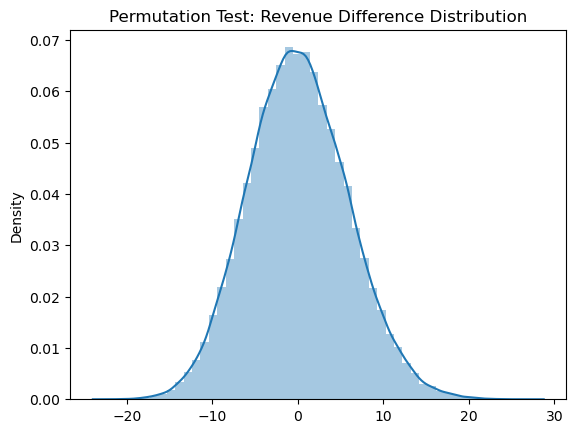

In [172]:
sns.distplot(resample_diff)
plt.title('Permutation Test: Revenue Difference Distribution')

หา Confidence Interval ของรายได้เฉลี่ยไตรมาส 2 และไตรมาสอื่นๆ

In [173]:
l_q2 = []
for _ in range(1000):
    tem = df_q2.sample(1000, replace=True)['revenue'].mean() 
    l_q2.append(tem)

q2_s = pd.Series(l_q2) 
print(f"Confidence Interval สำหรับไตรมาส 2 \n{q2_s.quantile([0.975, 0.025])}")

l_qo = []
for _ in range(1000):
    tem = df_q_other.sample(1000, replace=True)['revenue'].mean() 
    l_qo.append(tem)

qo_s = pd.Series(l_qo) 
print(f"Confidence Interval สำหรับไตรมาสอื่นๆ \n{qo_s.quantile([0.975, 0.025])}")

Confidence Interval สำหรับไตรมาส 2 
0.975    1.067556e+08
0.025    8.312185e+07
dtype: float64
Confidence Interval สำหรับไตรมาสอื่นๆ 
0.975    6.896937e+07
0.025    5.303619e+07
dtype: float64


       genres       revenue
2   Animation  3.318316e+08
1   Adventure  2.587722e+08
7      Family  2.337355e+08
8     Fantasy  2.191109e+08
16    Science  2.028259e+08
9     Fiction  2.028259e+08
0      Action  1.809149e+08
17   Thriller  8.725030e+07
3      Comedy  8.582779e+07
14    Mystery  6.951796e+07


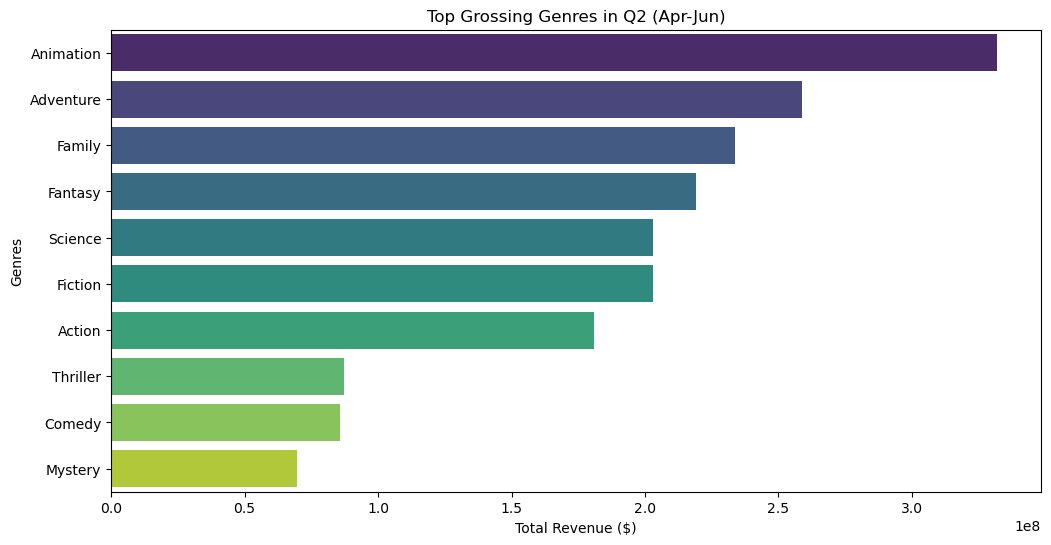

In [ ]:
q2=df_genres[(df_genres['release_month']>=4) & (df['release_month']<=6)]
genre_revenue_q2 = q2.groupby('genres')['revenue'].mean().reset_index()

# จัดอันดับแนวหนังที่ทำรายได้สูงสุด
genre_revenue_q2 = genre_revenue_q2.sort_values(by='revenue', ascending=False)

# แสดง 10 อันดับแนวหนังที่ทำรายได้สูงสุดในไตรมาส 2
print(genre_revenue_q2.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_revenue_q2.head(10), x='revenue', y='genres', palette='viridis')
plt.title("Top Grossing Genres in Q2 (Apr-Jun)")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Genres")
plt.show()